官方參考文獻：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# 建構隨機叢林

In [6]:
#n_estmators決策樹數量
#固定隨機種子 random_state
rfc = RandomForestClassifier(n_estimators=5,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [7]:
y_predict=rfc.predict(X_test)
y_predict

array([1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1,
       2])

In [8]:
rfc.score(X_test,y_test)

0.8888888888888888

# 優化範例

In [10]:
#取100棵樹，n_jobs = 電腦多核心運算，min_samples_leaf修剪樹枝每個樹枝中至少包含10個資訊量
rfc = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state=50,min_samples_leaf = 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=50)

# Feature Importance 重要特徵

In [11]:
imp = rfc.feature_importances_

In [12]:
imp

array([0.0982893 , 0.00317448, 0.37640544, 0.52213078])

In [13]:
#feature的名稱
names = iris.feature_names
names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

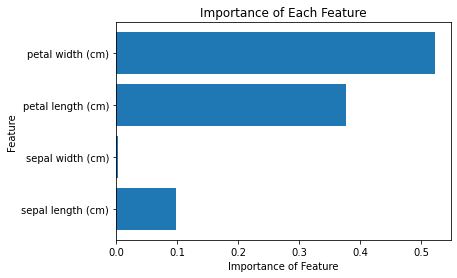

In [14]:
#畫圖呈現
zip(imp,names)
plt.barh(range(len(names)),imp,align = 'center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Feature')
plt.ylabel('Feature')
plt.title('Importance of Each Feature')
plt.show()